In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('Dataset_2_Team_18.csv')

In [3]:
df.head()

,x_1,x_2,Class_label
0,-0.685,0.6570,0
1,0.782,-0.0341,1
2,1.360,0.3980,0
3,0.470,0.6490,0
4,0.677,-0.7950,1


In [4]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [5]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

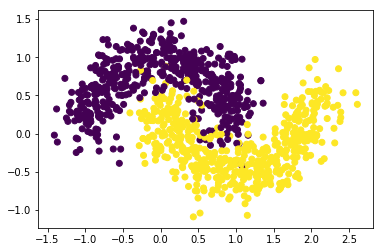

In [6]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df.Class_label)

In [7]:
penalty=[0.01,0.05,0.1,0.2,0.5,0.75,1,1.33,2,5,10,20,100,150]

In [8]:
for i in penalty:
    clf = svm.SVC(kernel='linear',C=i)
    clf.fit(X_train,Y_train)
    Y_test_pred=clf.predict(X_test)
    Y_train_pred=clf.predict(X_train)
    print("Train Accuracy for C = "+str(i)+" : ",metrics.accuracy_score(Y_train, Y_train_pred))
    print("Test  Accuracy for C = "+str(i)+" : ",metrics.accuracy_score(Y_test, Y_test_pred))

Train Accuracy for C = 0.01 :  0.83625
Test  Accuracy for C = 0.01 :  0.87
Train Accuracy for C = 0.05 :  0.86125
Test  Accuracy for C = 0.05 :  0.895
Train Accuracy for C = 0.1 :  0.87
Test  Accuracy for C = 0.1 :  0.9
Train Accuracy for C = 0.2 :  0.8725
Test  Accuracy for C = 0.2 :  0.9
Train Accuracy for C = 0.5 :  0.87125
Test  Accuracy for C = 0.5 :  0.9
Train Accuracy for C = 0.75 :  0.87
Test  Accuracy for C = 0.75 :  0.9
Train Accuracy for C = 1 :  0.87125
Test  Accuracy for C = 1 :  0.9
Train Accuracy for C = 1.33 :  0.87125
Test  Accuracy for C = 1.33 :  0.9
Train Accuracy for C = 2 :  0.8725
Test  Accuracy for C = 2 :  0.9
Train Accuracy for C = 5 :  0.8725
Test  Accuracy for C = 5 :  0.9
Train Accuracy for C = 10 :  0.8725
Test  Accuracy for C = 10 :  0.9
Train Accuracy for C = 20 :  0.8725
Test  Accuracy for C = 20 :  0.9
Train Accuracy for C = 100 :  0.8725
Test  Accuracy for C = 100 :  0.9
Train Accuracy for C = 150 :  0.87125
Test  Accuracy for C = 150 :  0.9


In [9]:
clf = svm.SVC(kernel='linear',C=10)
clf.fit(X_train,Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
clf.coef_

array([[ 0.83998477, -3.02645357]])

In [11]:
Y_test_pred=clf.predict(X_test)
Y_train_pred=clf.predict(X_train)
print("Train Accuracy : ",metrics.accuracy_score(Y_train, Y_train_pred))
print("Test  Accuracy : ",metrics.accuracy_score(Y_test, Y_test_pred))

Train Accuracy :  0.8725
Test  Accuracy :  0.9


In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_test_pred))

[[85 12]
 [ 8 95]]


In [13]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

<Figure size 2880x1440 with 0 Axes>

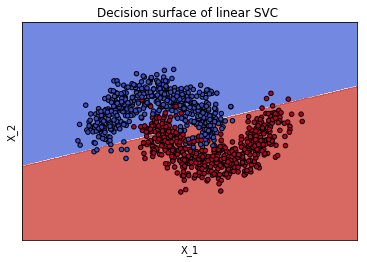

<Figure size 2880x1440 with 0 Axes>

In [14]:
plt.figure(figsize=(40,20))
fig, ax = plt.subplots()
# title for the plots
title = ("Decision surface of linear SVC ")
# Set-up grid for plotting.
X0, X1 = df.iloc[:, 0], df.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=df.Class_label, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("X_2")
ax.set_xlabel("X_1")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.figure(figsize=(40,20))
plt.show()

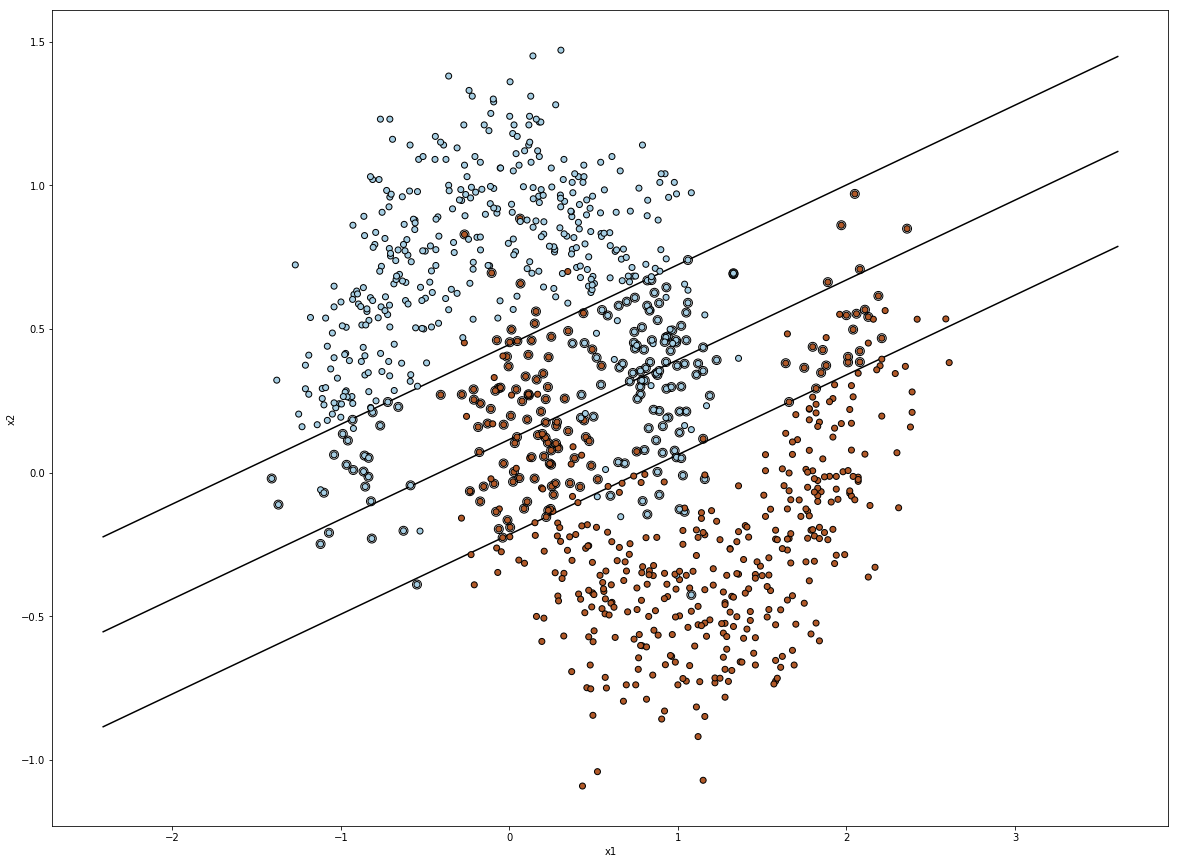

In [15]:
w = clf.coef_[0]
a = -w[0] / w[1]
x_min, x_max = X0.min() - 1, X0.max() + 1
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(20, 15))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X0, X1, c=df.Class_label, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Train Accuracy :  0.85375
Test  Accuracy :  0.88
[[79 18]
 [ 6 97]]


<Figure size 2880x1440 with 0 Axes>

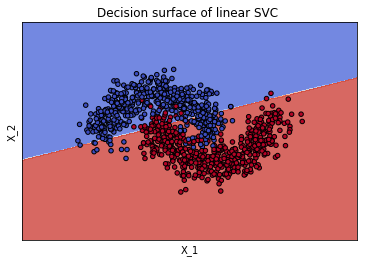

<Figure size 2880x1440 with 0 Axes>

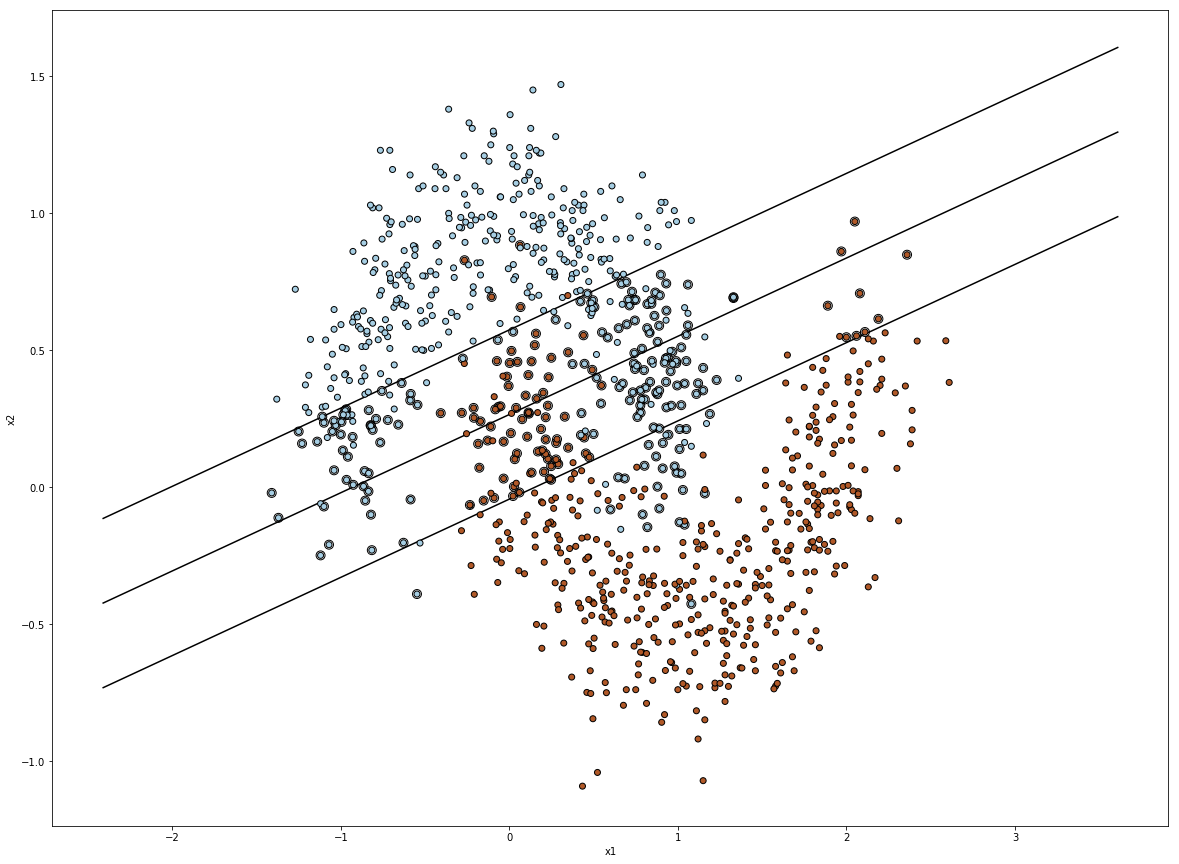

In [16]:
clf = svm.SVC(kernel='linear',C=10,class_weight={0:1,1:2})
clf.fit(X_train,Y_train)
Y_test_pred=clf.predict(X_test)
Y_train_pred=clf.predict(X_train)
print("Train Accuracy : ",metrics.accuracy_score(Y_train, Y_train_pred))
print("Test  Accuracy : ",metrics.accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

plt.figure(figsize=(40,20))
fig, ax = plt.subplots()
# title for the plots
title = ("Decision surface of linear SVC ")
# Set-up grid for plotting.
X0, X1 = df.iloc[:, 0], df.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=df.Class_label, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("X_2")
ax.set_xlabel("X_1")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.figure(figsize=(40,20))
plt.show()

w = clf.coef_[0]
a = -w[0] / w[1]
x_min, x_max = X0.min() - 1, X0.max() + 1
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(20, 15))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X0, X1, c=df.Class_label, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Train Accuracy :  0.845
Test  Accuracy :  0.865
[[ 73  24]
 [  3 100]]


<Figure size 2880x1440 with 0 Axes>

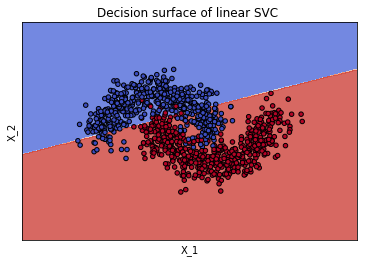

<Figure size 2880x1440 with 0 Axes>

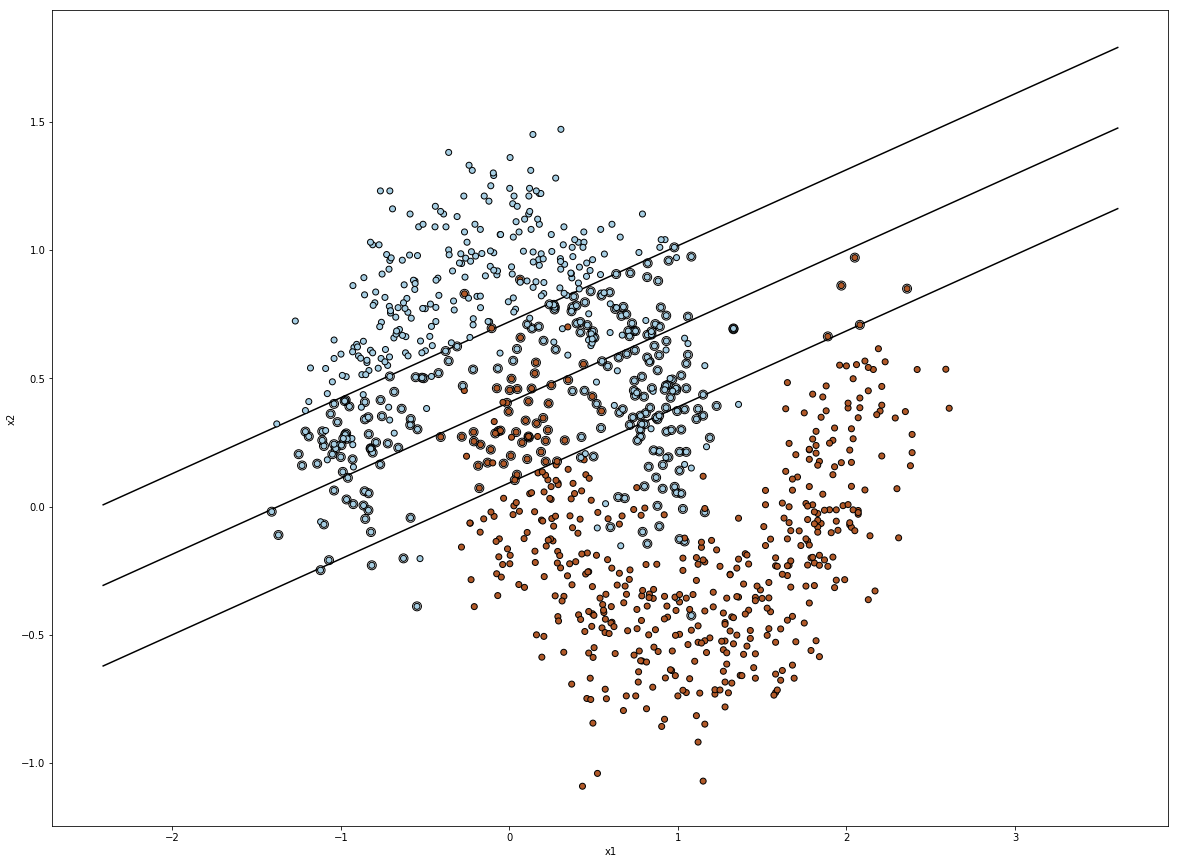

In [17]:
clf = svm.SVC(kernel='linear',C=10,class_weight={0:1,1:4})
clf.fit(X_train,Y_train)
Y_test_pred=clf.predict(X_test)
Y_train_pred=clf.predict(X_train)
print("Train Accuracy : ",metrics.accuracy_score(Y_train, Y_train_pred))
print("Test  Accuracy : ",metrics.accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

plt.figure(figsize=(40,20))
fig, ax = plt.subplots()
# title for the plots
title = ("Decision surface of linear SVC ")
# Set-up grid for plotting.
X0, X1 = df.iloc[:, 0], df.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=df.Class_label, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("X_2")
ax.set_xlabel("X_1")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.figure(figsize=(40,20))
plt.show()

w = clf.coef_[0]
a = -w[0] / w[1]
x_min, x_max = X0.min() - 1, X0.max() + 1
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(20, 15))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X0, X1, c=df.Class_label, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Train Accuracy :  0.8075
Test  Accuracy :  0.8
[[ 58  39]
 [  1 102]]


<Figure size 2880x1440 with 0 Axes>

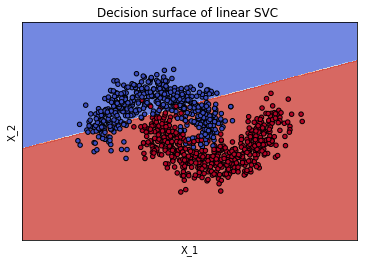

<Figure size 2880x1440 with 0 Axes>

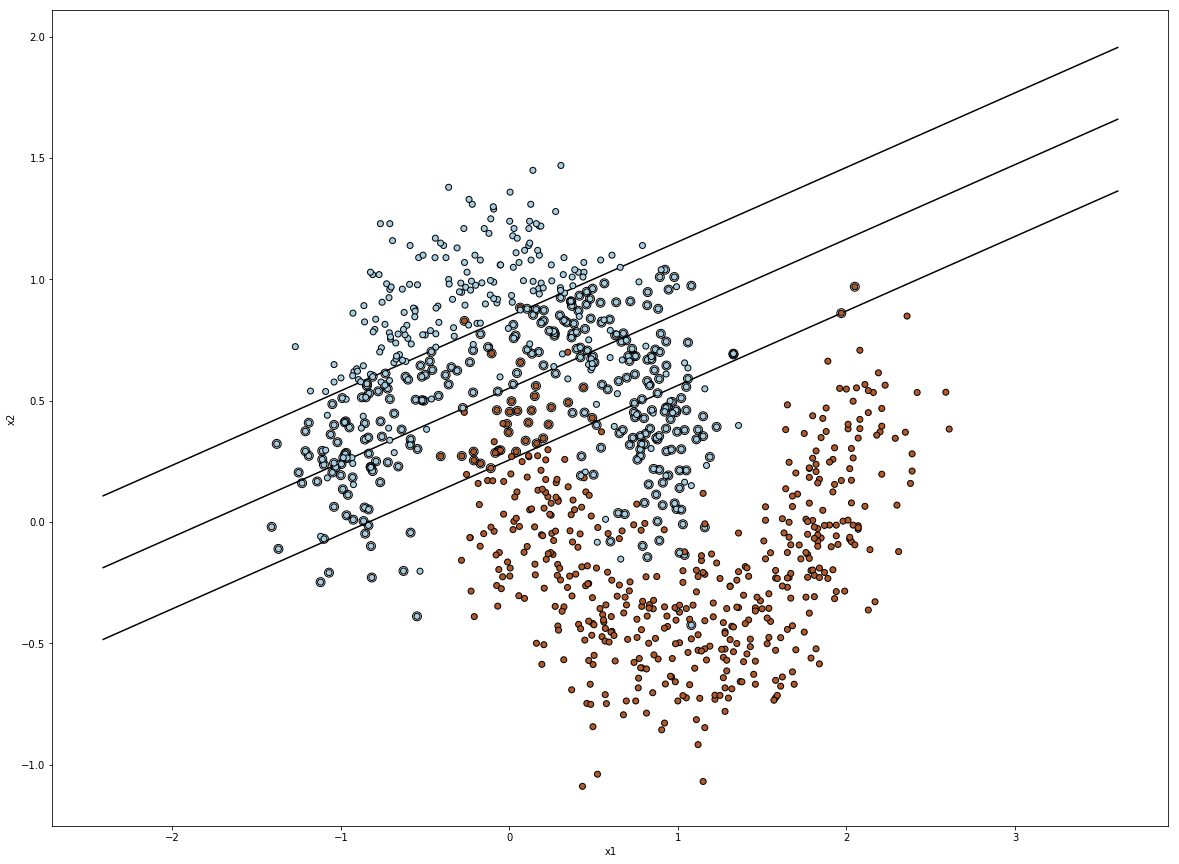

In [18]:
clf = svm.SVC(kernel='linear',C=10,class_weight={0:1,1:8})
clf.fit(X_train,Y_train)
Y_test_pred=clf.predict(X_test)
Y_train_pred=clf.predict(X_train)
print("Train Accuracy : ",metrics.accuracy_score(Y_train, Y_train_pred))
print("Test  Accuracy : ",metrics.accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

plt.figure(figsize=(40,20))
fig, ax = plt.subplots()
# title for the plots
title = ("Decision surface of linear SVC ")
# Set-up grid for plotting.
X0, X1 = df.iloc[:, 0], df.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=df.Class_label, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("X_2")
ax.set_xlabel("X_1")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.figure(figsize=(40,20))
plt.show()

w = clf.coef_[0]
a = -w[0] / w[1]
x_min, x_max = X0.min() - 1, X0.max() + 1
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(20, 15))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X0, X1, c=df.Class_label, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Train Accuracy :  0.7575
Test  Accuracy :  0.75
[[ 47  50]
 [  0 103]]


<Figure size 2880x1440 with 0 Axes>

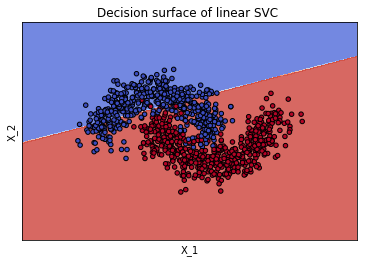

<Figure size 2880x1440 with 0 Axes>

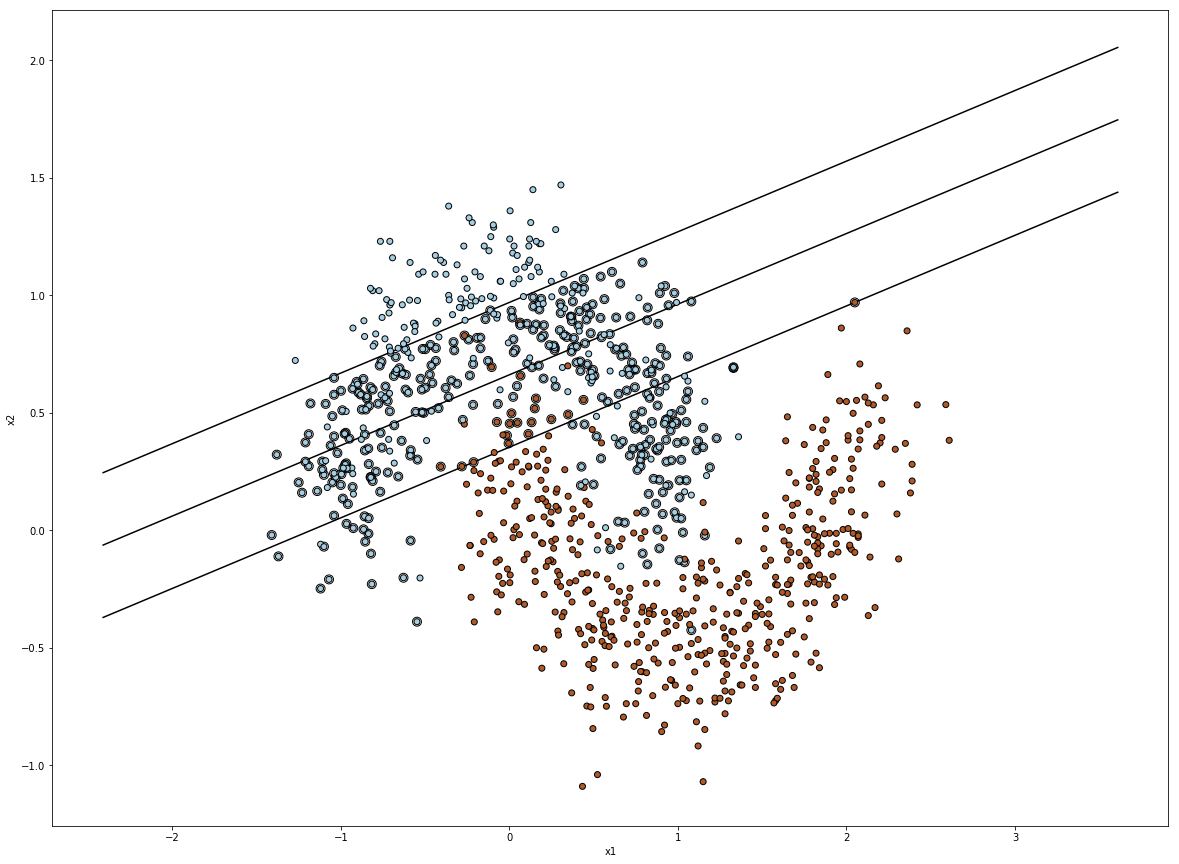

In [19]:
clf = svm.SVC(kernel='linear',C=10,class_weight={0:1,1:16})
clf.fit(X_train,Y_train)
Y_test_pred=clf.predict(X_test)
Y_train_pred=clf.predict(X_train)
print("Train Accuracy : ",metrics.accuracy_score(Y_train, Y_train_pred))
print("Test  Accuracy : ",metrics.accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

plt.figure(figsize=(40,20))
fig, ax = plt.subplots()
# title for the plots
title = ("Decision surface of linear SVC ")
# Set-up grid for plotting.
X0, X1 = df.iloc[:, 0], df.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=df.Class_label, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("X_2")
ax.set_xlabel("X_1")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.figure(figsize=(40,20))
plt.show()

w = clf.coef_[0]
a = -w[0] / w[1]
x_min, x_max = X0.min() - 1, X0.max() + 1
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(20, 15))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(X0, X1, c=df.Class_label, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()